In [1]:
from pathlib import Path
import pandas as pd
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
# ---------- 1. Initial Samples  ---------- #
# Initial Samples from source task
current_dir = Path.cwd()
csv_path = current_dir.parent / "data" / "Classifier.csv"
df = pd.read_csv(csv_path)
X = torch.tensor(df[["power", "hatch_distance"]].values, dtype=torch.double)
Y = torch.tensor(df[["fused"]].values, dtype=torch.double).squeeze()

print(X.shape)
print(Y.shape)

torch.Size([60, 2])
torch.Size([60])


In [2]:
# 2. 拆分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=37)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([48, 2]) torch.Size([12, 2]) torch.Size([48]) torch.Size([12])


=== report ===
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



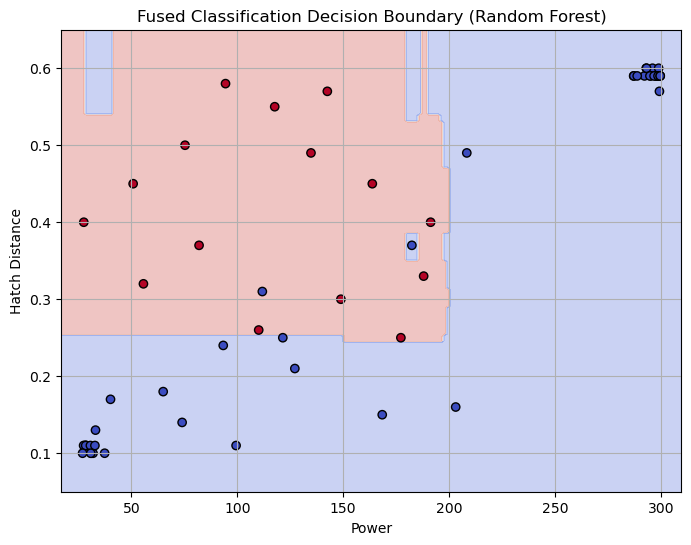

In [4]:
# 3. train
clf = RandomForestClassifier(n_estimators=1000, random_state=96)
clf.fit(X_train, y_train)

# 4. evolution
y_pred = clf.predict(X_test)
print("=== report ===")
print(classification_report(y_test, y_pred))

#   model\target  |  positive       | negative
#--------------------------------------------------
#       ture      |  ture_positive  | false_positive             
#--------------------------------------------------
#       false     |  false_negative | ture_negative
#-------------------------------------------------- 
# precision = ture_positive/(ture_positive+false_positive) 
# recall = ture_positive/(ture_positive+false_negative)
# 5. visualization
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap='coolwarm_r')
plt.xlabel('Power')
plt.ylabel('Hatch Distance')
plt.title('Fused Classification Decision Boundary (Random Forest)')
plt.grid(True)
plt.show()